In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score,
                             classification_report)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
# 1.	Загрузить CSV-файл и вывести первые 10 строк.
df = pd.read_csv('TelcoCustomers.csv')
df.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
# 2.	Посмотреть .info() и .shape.
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(7043, 21)

In [ ]:
# 3.	Проверить уникальные значения по object-признакам.
# df.select_dtypes(include=['object']).nunique()
obj_col = df.select_dtypes(include=['object']).columns
for i in obj_col:
    print(f'{i}: {df[i].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [ ]:
# 4.	Преобразовать TotalCharges в числовой тип.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
# 5.	Оставить выбранные признаки + целевую переменную.
df = df[['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'InternetService', 'OnlineSecurity', 'TechSupport']]

In [ ]:
# 6.	Сохранить очищенный датасет в churn_clean.csv.
df.to_csv('churn_clean.csv')

In [ ]:
df.shape

(7043, 8)

In [ ]:
# 7.	Средний tenure, MonthlyCharges, TotalCharges.
df[['tenure', 'MonthlyCharges', 'TotalCharges']].mean().round(2)

,0
tenure,32.37
MonthlyCharges,64.76
TotalCharges,2283.30


In [ ]:
# 8.	Распределение по Contract, InternetService, Churn — value_counts().
df[['Contract', 'InternetService', 'Churn']].value_counts()

Contract        InternetService  Churn
Month-to-month  Fiber optic      Yes      1162
                                 No        966
                DSL              No        829
Two year        No               No        633
                DSL              No        616
One year        DSL              No        517
                Fiber optic      No        435
Month-to-month  No               No        425
Two year        Fiber optic      No        398
Month-to-month  DSL              Yes       394
One year        No               No        355
                Fiber optic      Yes       104
Month-to-month  No               Yes        99
One year        DSL              Yes        53
Two year        Fiber optic      Yes        31
                DSL              Yes        12
One year        No               Yes         9
Two year        No               Yes         5
Name: count, dtype: int64

In [ ]:
# 9.	Средние показатели по группам Churn.
df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean().round(2)

,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.57,61.27,2555.34
Yes,17.98,74.44,1531.80


In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
# 10.	Количество клиентов с tenure < 3 месяцев.
count_tenure = (df['tenure'] < 3).sum()
print(f'Количество клиентов с tenure < 3 месяцев: {count_tenure}')

Количество клиентов с tenure < 3 месяцев: 862


In [ ]:
# 11.	Доля клиентов с MonthlyCharges > 100.
count_MonthlyCharges = df['MonthlyCharges'].shape[0]
count_more100 = (df['MonthlyCharges'] > 100).sum()
print(f'{round((count_more100 * 100) / count_MonthlyCharges, 2)}%')

12.81%


In [ ]:
# 12.	Группировка по Contract — средний TotalCharges.
df.groupby('Contract')['TotalCharges'].mean().round()

,TotalCharges
Contract,
Month-to-month,1369.0
One year,3035.0
Two year,3729.0


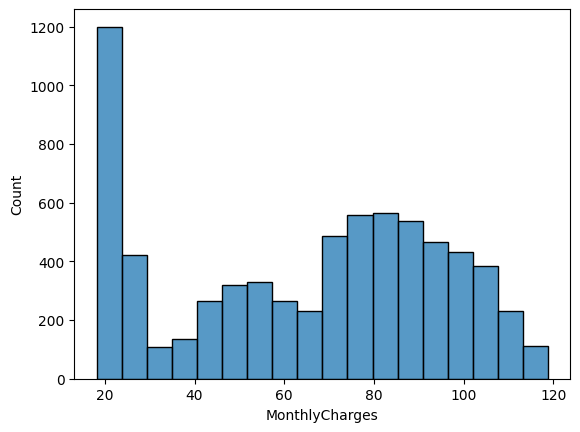

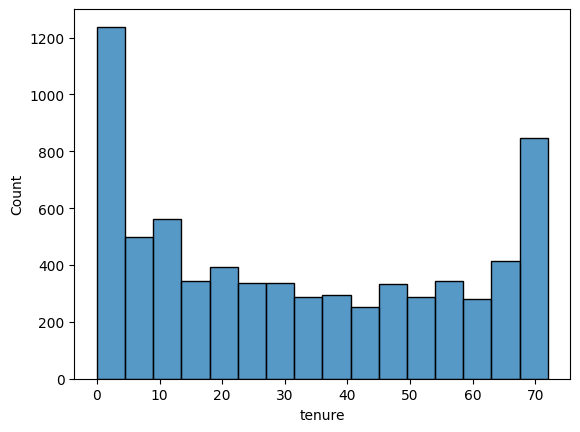

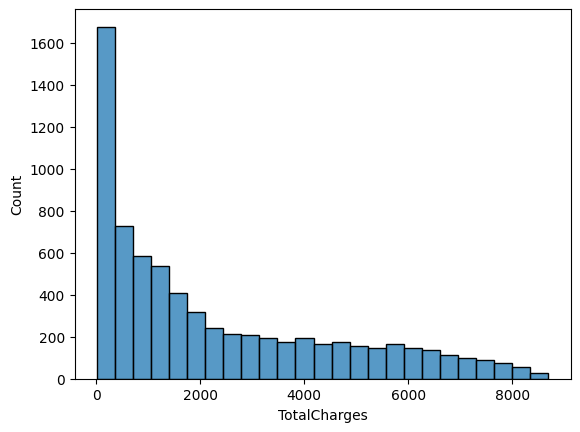

In [ ]:
# 13.	hist / distplot по MonthlyCharges, tenure, TotalCharges.
categorical_features = ['MonthlyCharges', 'tenure', 'TotalCharges']

for feature in categorical_features:
    sns.histplot(x=feature, data=df)
    plt.show()

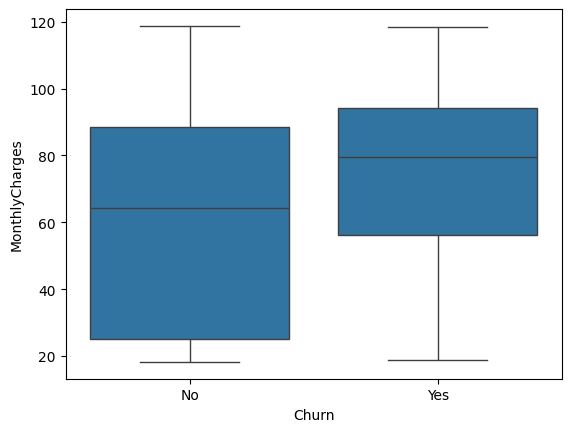

In [ ]:
# 14.	boxplot: Churn vs MonthlyCharges.
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.show()

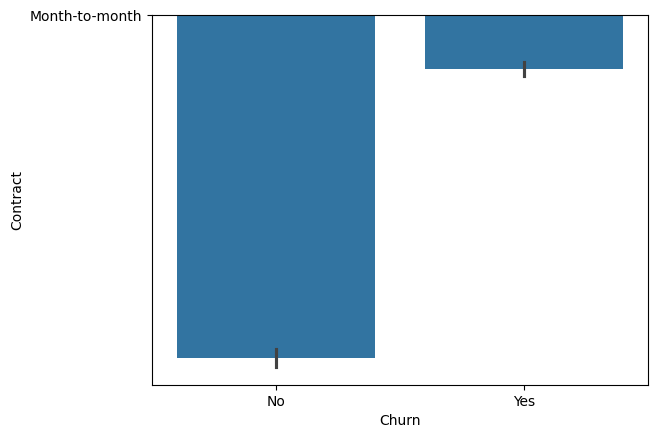

In [ ]:
# 15.	barplot: Churn vs Contract.
sns.barplot(x='Churn', y='Contract', data=df)
plt.show()

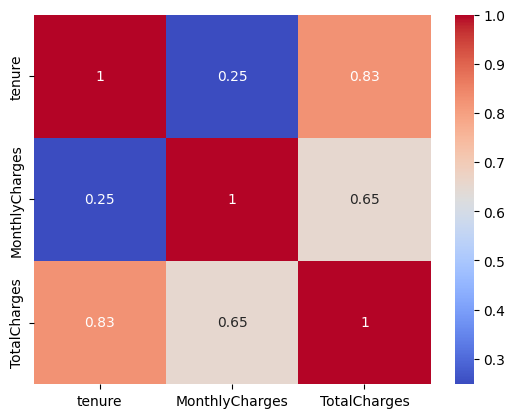

In [ ]:
# 16.	heatmap корреляций числовых признаков.
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

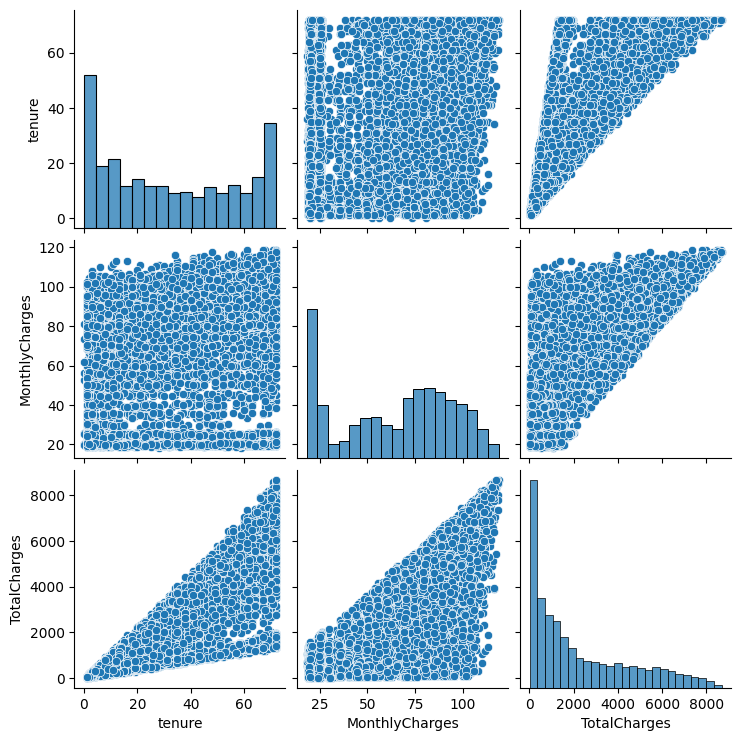

In [ ]:
# 17.	pairplot по числовым признакам + Churn.
sns.pairplot(df.select_dtypes(include=[int, float]))
plt.show()

In [ ]:
# 18.	Проверить пропущенные значения и заполнить/удалить.
# (df.isnull()).sum()
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, columns=['Contract', 'InternetService', 'TechSupport', 'OnlineSecurity'], drop_first=True, dtype=int)

In [ ]:
scaler = StandardScaler()
features = df.drop(columns=['Churn'])
scaled = scaler.fit_transform(features)

In [ ]:
X = scaled
y = df['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
log_model = LogisticRegression()
rf_model = RandomForestClassifier()
tree_model = DecisionTreeClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()
grad_model = GradientBoostingClassifier()
xgb_model = XGBClassifier()


In [ ]:
log_model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
svm_model.fit(X_train, y_train)


SVC()

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
grad_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_grad = grad_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
print('all metrics:')
print(f'Log model: {accuracy_score(y_test, y_pred_log)}')
print(f'Tree model: {accuracy_score(y_test, y_pred_tree)}')
print(f'RF model: {accuracy_score(y_test, y_pred_rf)}')
print(f'SVM model: {accuracy_score(y_test, y_pred_svm)}')
print(f'KNN model: {accuracy_score(y_test, y_pred_knn)}')
print(f'Grad model: {accuracy_score(y_test, y_pred_grad)}')
print(f'XGB model: {accuracy_score(y_test, y_pred_xgb)}')

all metrics:
Log model: 0.8062455642299503
Tree model: 0.7345635202271115
RF model: 0.7835344215755855
SVM model: 0.8048261178140526
KNN model: 0.7814052519517388
Grad model: 0.8076650106458482
XGB model: 0.7920511000709723


In [ ]:
import joblib
joblib.dump(log_model, 'log_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_tree = {
    'max_depth': [2, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
grid_search_tree = GridSearchCV(estimator=dt, param_grid=param_grid_tree, cv=5,
                           scoring='f1', n_jobs=-1, verbose=1)

In [ ]:
grid_search_tree.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

In [ ]:
print('The best hyperparemeters:', grid_search_tree.best_params_)

The best hyperparemeters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [ ]:
dtree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=2,
    min_samples_leaf=1,
    min_samples_split=2
)

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
y_pred_tree_2 = dtree.predict(X_test)

In [ ]:
print(f'Tree model: {accuracy_score(y_test, y_pred_tree_2)}')

Tree model: 0.8019872249822569


In [ ]:
grid_search_tree_accuracy = GridSearchCV(estimator=dt, param_grid=param_grid_tree, cv=5,
                           scoring='accuracy', n_jobs=-1, verbose=1)

In [ ]:
grid_search_tree_accuracy.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [ ]:
print('The best hyperparemeters:', grid_search_tree_accuracy.best_params_)

The best hyperparemeters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
dtree_accuracy = DecisionTreeClassifier(
    criterion='gini',
    max_depth=2,
    min_samples_leaf=1,
    min_samples_split=2
)

In [ ]:
import joblib
joblib.dump(dtree, 'dtree_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
grad_model = GradientBoostingClassifier()
grad_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_grad = grad_model.predict(X_test)


In [ ]:
print('all metrics:')
print(f'Log model: {classification_report(y_test, y_pred_log)}')
print(f'Tree model: {classification_report(y_test, y_pred_tree)}')
print(f'RF model: {classification_report(y_test, y_pred_rf)}')
print(f'SVM model: {classification_report(y_test, y_pred_svm)}')
print(f'KNN model: {classification_report(y_test, y_pred_knn)}')
print(f'Grad model: {classification_report(y_test, y_pred_grad)}')

all metrics:
Log model:               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.55      0.60       373

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Tree model:               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1036
           1       0.50      0.50      0.50       373

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409

RF model:               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.61      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77     